In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
ytb_data = pd.read_csv('/content/drive/MyDrive/Y3S3/DW/Project/Cleaned Global YouTube Statistics.csv')

ytb_data.head(10)

,index,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_day
0,0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,...,6800000.00,1.084000e+08,2000000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-03-13
1,1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,...,0.04,5.800000e-01,244908,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-03-05
2,2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,...,4000000.00,6.470000e+07,8000000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2012-02-20
3,3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,...,5900000.00,9.480000e+07,1000000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-09-01
4,4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,...,5500000.00,8.750000e+07,1000000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-09-20
5,6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,...,2200000.00,3.510000e+07,688888,88.2,328239523,14.70,270663028,37.090240,-95.712891,2015-05-12
6,7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,...,117600.00,1.900000e+06,388888,63.2,126226568,2.29,115782416,36.204824,138.252924,2010-04-29
7,8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,...,146800.00,2.300000e+06,100000,81.9,144373535,4.59,107683889,61.524010,105.318756,2016-01-14
8,9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,...,1700000.00,2.790000e+07,600000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2018-04-23
9,10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,...,2400000.00,3.860000e+07,1100000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2014-03-12


In [4]:
ytb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   index                                    824 non-null    int64  
 1   rank                                     824 non-null    int64  
 2   Youtuber                                 824 non-null    object 
 3   subscribers                              824 non-null    int64  
 4   video views                              824 non-null    float64
 5   category                                 824 non-null    object 
 6   Title                                    824 non-null    object 
 7   uploads                                  824 non-null    int64  
 8   Country                                  824 non-null    object 
 9   Abbreviation                             824 non-null    object 
 10  channel_type                             824 non-n

# <font color = 'red'>EDA </font>

In [5]:
summary = ytb_data.describe(include=np.number)

#convert video views into Million
summary['video views'] = summary['video views']/1000000
summary["video views"] = summary["video views"].map("${:,.2f}M".format)

#convert earnings into thousand
summary['lowest_monthly_earnings'] = summary["lowest_monthly_earnings"] / 1000
summary["lowest_monthly_earnings"] = summary["lowest_monthly_earnings"].map("${:,.2f}K".format)
summary['highest_monthly_earnings'] = summary["highest_monthly_earnings"] / 1000
summary["highest_monthly_earnings"] = summary["highest_monthly_earnings"].map("${:,.2f}K".format)
summary['lowest_yearly_earnings'] = summary["lowest_yearly_earnings"] / 1000
summary["lowest_yearly_earnings"] = summary["lowest_yearly_earnings"].map("${:,.2f}K".format)
summary['highest_yearly_earnings'] = summary["highest_yearly_earnings"] / 1000
summary["highest_yearly_earnings"] = summary["highest_yearly_earnings"].map("${:,.2f}K".format)

summary

,index,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,824.000000,824.000000,8.240000e+02,$0.00M,824.000000,8.240000e+02,824.000000,824.000000,8.240000e+02,$0.82K,$0.82K,$0.82K,$0.82K,8.240000e+02,824.000000,8.240000e+02,824.000000,8.240000e+02,824.000000,824.000000
mean,499.674757,500.674757,2.303835e+07,"$11,483.17M",10964.442961,2.419731e+05,339.768204,429.889563,1.752898e+08,$38.09K,$609.00K,$456.75K,"$7,313.90K",2.982279e+05,63.414320,4.330127e+08,9.252536,2.247570e+08,26.488268,-14.352538
std,285.846539,285.846539,1.816449e+07,"$15,097.25M",37279.310817,9.221265e+05,1153.374716,1401.645490,4.113383e+08,$66.27K,"$1,059.11K",$794.09K,"$12,723.05K",4.901734e+05,25.920483,4.754023e+08,4.865636,1.550572e+08,20.787303,84.419098
min,0.000000,1.000000,1.230000e+07,$0.00M,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,$0.00K,$0.00K,$0.00K,$0.00K,1.000000e+00,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,256.250000,257.250000,1.450000e+07,"$4,345.24M",316.250000,2.817500e+02,11.000000,25.000000,2.603950e+07,$5.38K,$85.45K,$64.05K,"$1,000.00K",1.000000e+05,36.300000,8.313280e+07,5.360000,5.590832e+07,20.593684,-95.712891
50%,506.500000,507.500000,1.760000e+07,"$7,867.06M",966.500000,7.960000e+02,48.500000,61.500000,7.217422e+07,$16.00K,$255.95K,$192.00K,"$3,100.00K",1.946765e+05,67.000000,3.282395e+08,8.880000,2.706630e+08,37.090240,-51.925280
75%,743.250000,744.250000,2.412500e+07,"$13,850.86M",3597.250000,2.179500e+03,118.000000,132.000000,1.698908e+08,$40.83K,$653.05K,$489.80K,"$7,825.00K",3.000000e+05,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,994.000000,995.000000,2.450000e+08,"$228,000.00M",301308.000000,4.057944e+06,7741.000000,7670.000000,6.589000e+09,$576.00K,"$9,200.00K","$6,900.00K","$110,600.00K",8.000000e+06,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


# Top 10 Youtuber in term of Video_views

<ipython-input-6-38339bae3f47>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Top 10 Youtube Channel in terms of views')

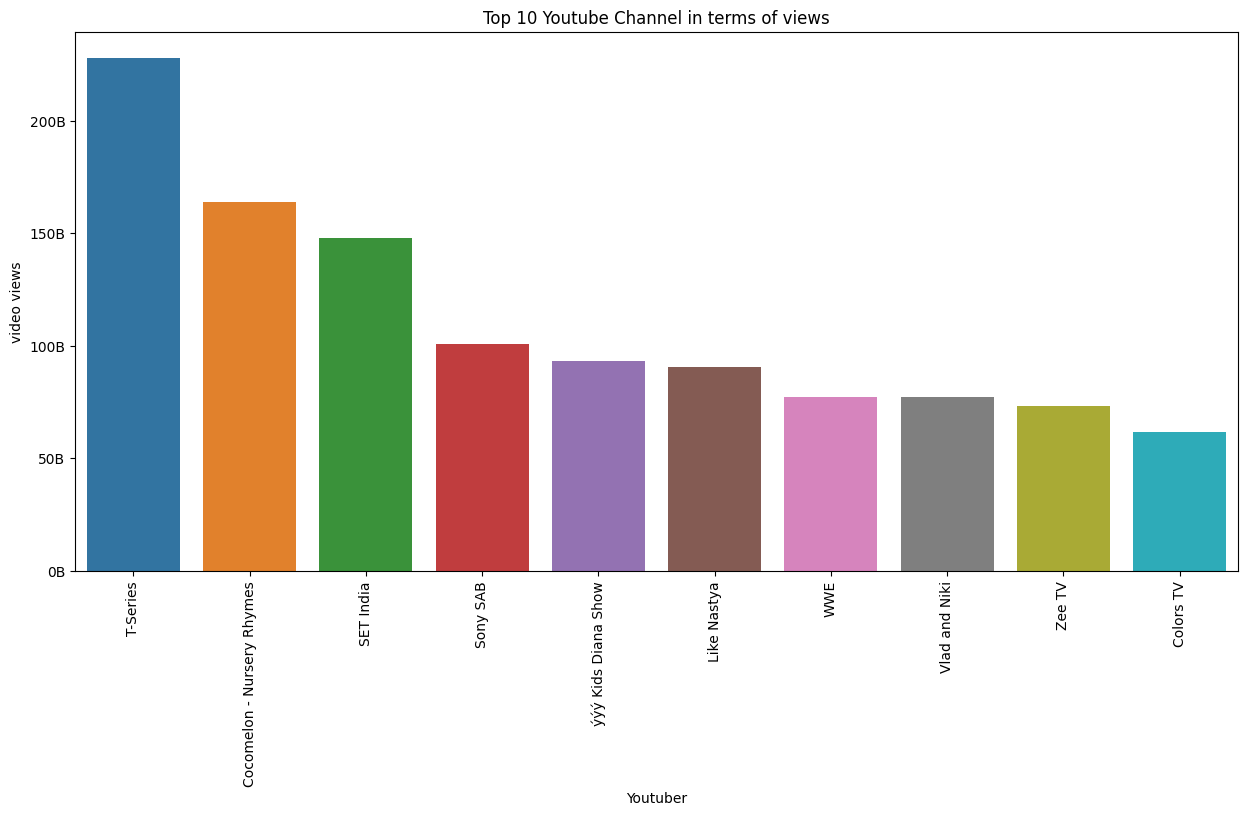

In [6]:
view_sort = ytb_data.sort_values('video views', ascending=False)

view_sort = view_sort['Youtuber'].iloc[:10]


plt.figure(figsize=(15,7))

sns.barplot(data=ytb_data, x='Youtuber', y='video views', order=view_sort)

plt.xticks(rotation=90)

plt.gca().set_yticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_yticks()])

plt.title('Top 10 Youtube Channel in terms of views')


<font color='red'> Highest average view for last 30 days of Top 20 Youtube channels is T-seris with views more than 2 billion</font>

# Top 10 youtuber globally in term of subscribers




<ipython-input-7-bd31ea255ea2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Top 10 Youtuber In Term of Subscribers')

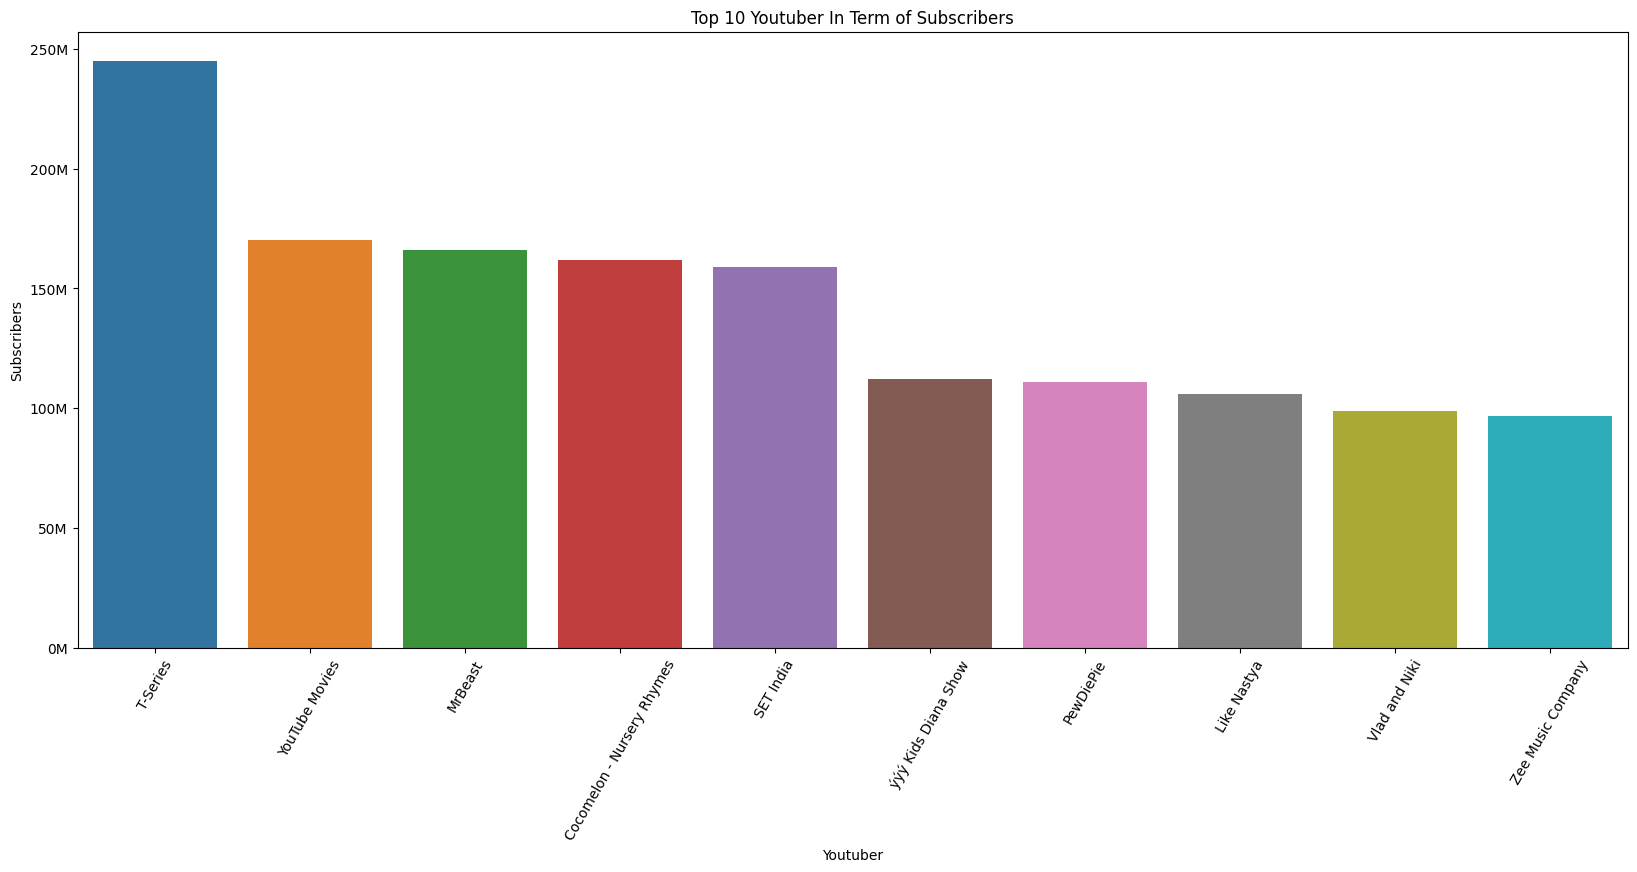

In [7]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=ytb_data, x='Youtuber', y='subscribers', order=ytb_data.sort_values('subscribers', ascending=False).Youtuber.iloc[:10])


plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.ylabel('Subscribers')
plt.xticks(rotation=60)
plt.title('Top 10 Youtuber In Term of Subscribers')

# Top 10 highest yearly earning

combine lowest and highest salary per month and year

In [8]:
#

ytb_data2 = ytb_data.drop('index', axis=1)


avg_annual_salary = (ytb_data['lowest_yearly_earnings'] + ytb_data['highest_yearly_earnings'])/2

avg_month_salary = (ytb_data['lowest_monthly_earnings'] + ytb_data['highest_monthly_earnings'])/2

ytb_data2.insert(13,'Average Monthly Salary (USD)', avg_month_salary)

ytb_data2.insert(14,'Average Annual Salary (USD)', avg_annual_salary)


In [9]:
ytb_data2.drop(['lowest_yearly_earnings', 'highest_yearly_earnings', 'lowest_monthly_earnings', 'highest_monthly_earnings'], axis=1, inplace=True)

In [10]:
ytb_data2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,Average Annual Salary (USD),video_views_for_the_last_30_days,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_day
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,57600000.00,2258000000,2000000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-03-13
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.31,12,244908,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-03-05
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,34350000.00,1348000000,8000000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,50350000.00,1975000000,1000000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-09-01
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,46500000.00,1824000000,1000000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-09-20


# Top 10 monthly and yearly earnings

<ipython-input-11-968c3a8d7acc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])
<ipython-input-11-968c3a8d7acc>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Top 10 Highest Yearly Earning')

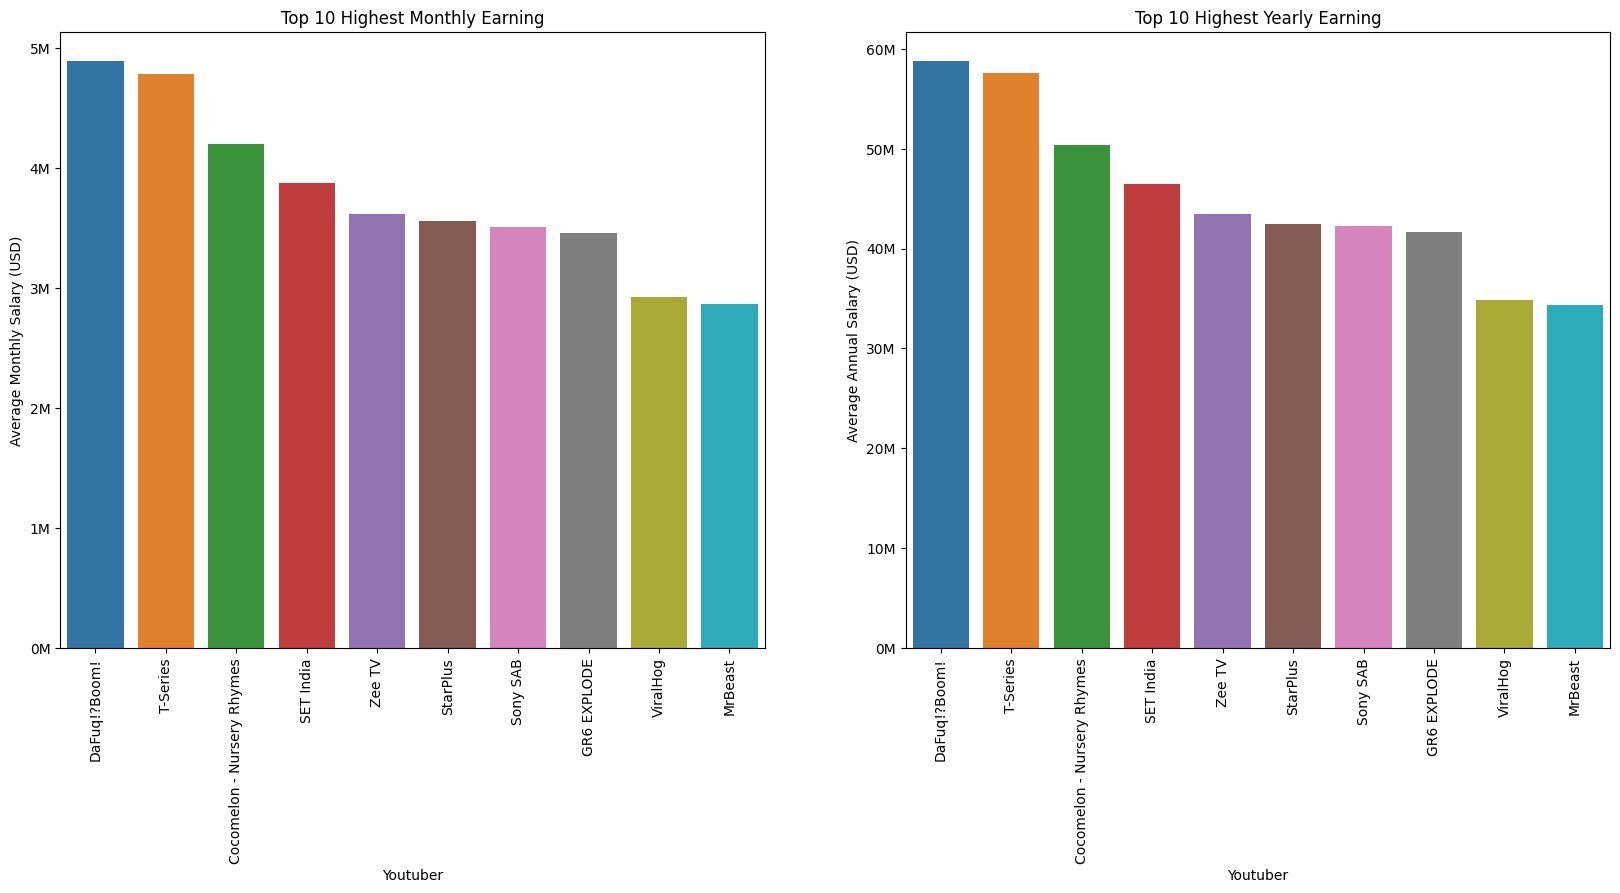

In [11]:
# top 10 monthly  earnings

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

month_earn = ytb_data2.sort_values('Average Monthly Salary (USD)', ascending=False)

month_earn = month_earn['Youtuber'].iloc[0:10]

sns.barplot(x='Youtuber', y='Average Monthly Salary (USD)', data=ytb_data2, order=month_earn)

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.title('Top 10 Highest Monthly Earning')

plt.xticks(rotation=90)

# top 10 yearly earning

plt.subplot(1,2,2)

year_earn = ytb_data2.sort_values('Average Annual Salary (USD)', ascending=False)

year_earn = year_earn['Youtuber'].iloc[0:10]

sns.barplot(x='Youtuber', y='Average Annual Salary (USD)', data=ytb_data2, order=year_earn)

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.xticks(rotation=90)

plt.title('Top 10 Highest Yearly Earning')


<font color='red'> Highest average highest monthly and yearly earnings of Youtube channels is 'DaFuq!?Boom!' follows by 'T-series' </font>

# Top 10 number of uploads done

<ipython-input-12-4c4746a0d603>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 50000.0, '50,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 150000.0, '150,000'),
 Text(0, 200000.0, '200,000'),
 Text(0, 250000.0, '250,000'),
 Text(0, 300000.0, '300,000'),
 Text(0, 350000.0, '350,000')]

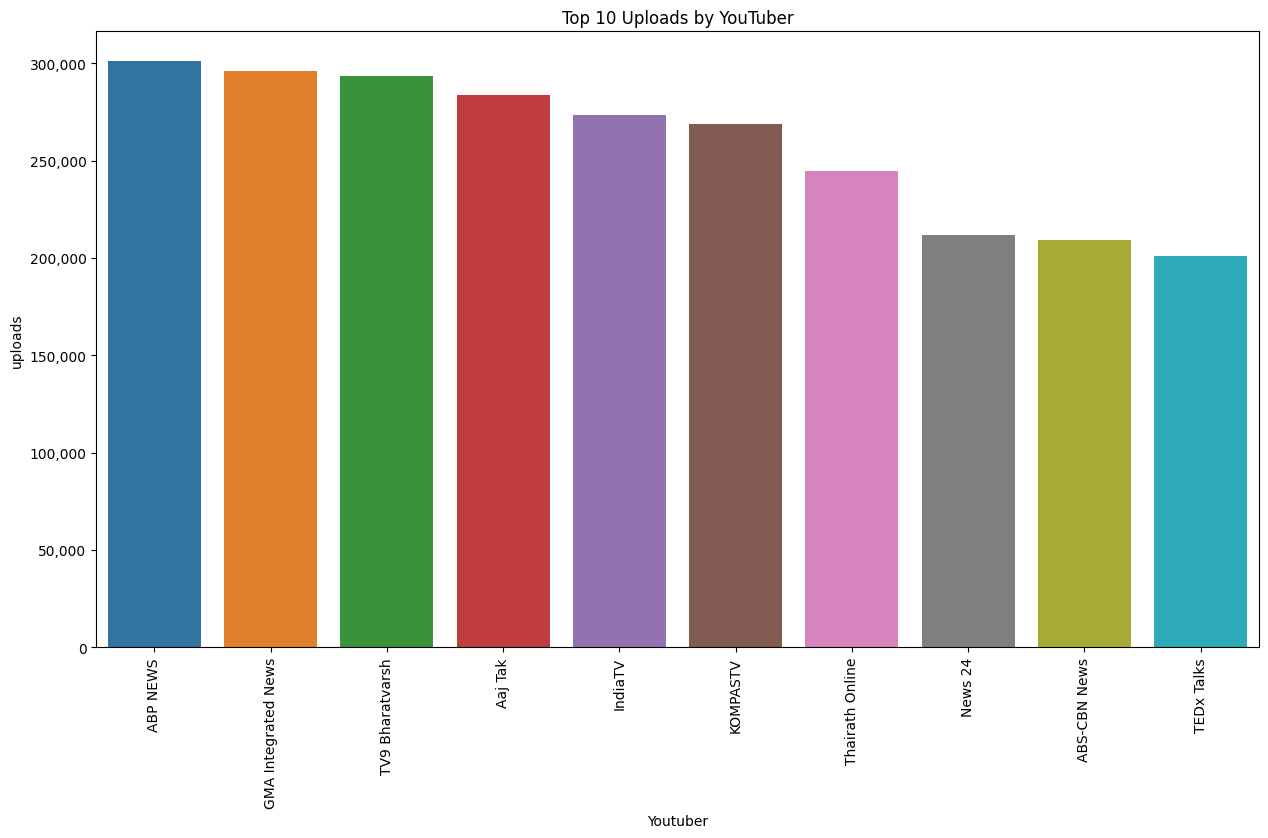

In [12]:
# top 10 uploads

plt.figure(figsize=(15,8))

uploads = ytb_data2.sort_values('uploads', ascending=False)

uploads = uploads['Youtuber'].iloc[0:10]

sns.barplot(x='Youtuber', y='uploads', data=ytb_data2, order=uploads)

# plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.title('Top 10 Uploads by YouTuber')

plt.xticks(rotation=90)

current_values = plt.gca().get_yticks()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


<font color='red'> Highest average uploads done by Youtube channel is ABP News with approximately 300,000 uploads</font>

# All countries with number of Youtube channels




In [13]:
country = ytb_data2['Country'].value_counts().sort_values(ascending=False)

Text(0, 0.5, 'Count')

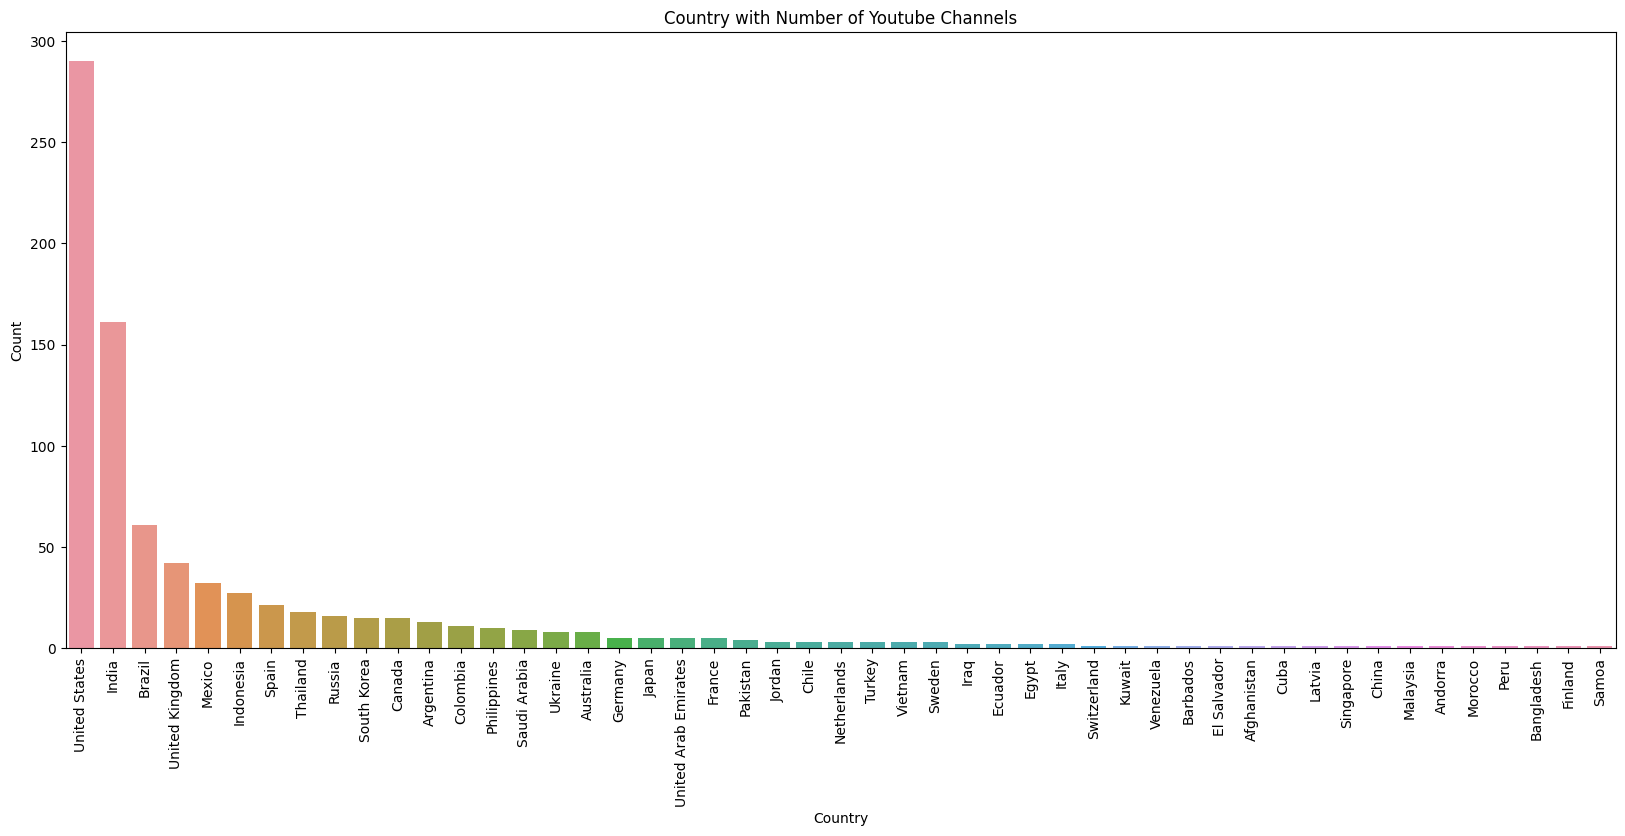

In [14]:
# Country with number of Youtube channels

plt.figure(figsize=(20,8))

sns.barplot(x=country.index, y=country.values)

plt.title('Country with Number of Youtube Channels')

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')

<font color='red'> The greatest number of YouTube channels is from USA with nearly 300. The least number of YouTube channels is from Samoa.

# Number of views for each channel type

In [15]:
view_type = ytb_data.groupby(['channel_type'])['video views'].agg('mean').sort_values(ascending=False)

view_type

channel_type
Education        1.707868e+10
Music            1.542108e+10
Animals          1.471175e+10
Sports           1.302390e+10
Entertainment    1.131594e+10
Film             1.111833e+10
News             1.000160e+10
Comedy           8.975710e+09
People           8.903602e+09
Games            7.249630e+09
Autos            7.010591e+09
Nonprofit        5.431456e+09
Howto            5.290743e+09
Tech             3.640931e+09
Name: video views, dtype: float64

<ipython-input-16-29db42a5ce94>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_yticks()])


Text(0, 0.5, 'Number of Views')

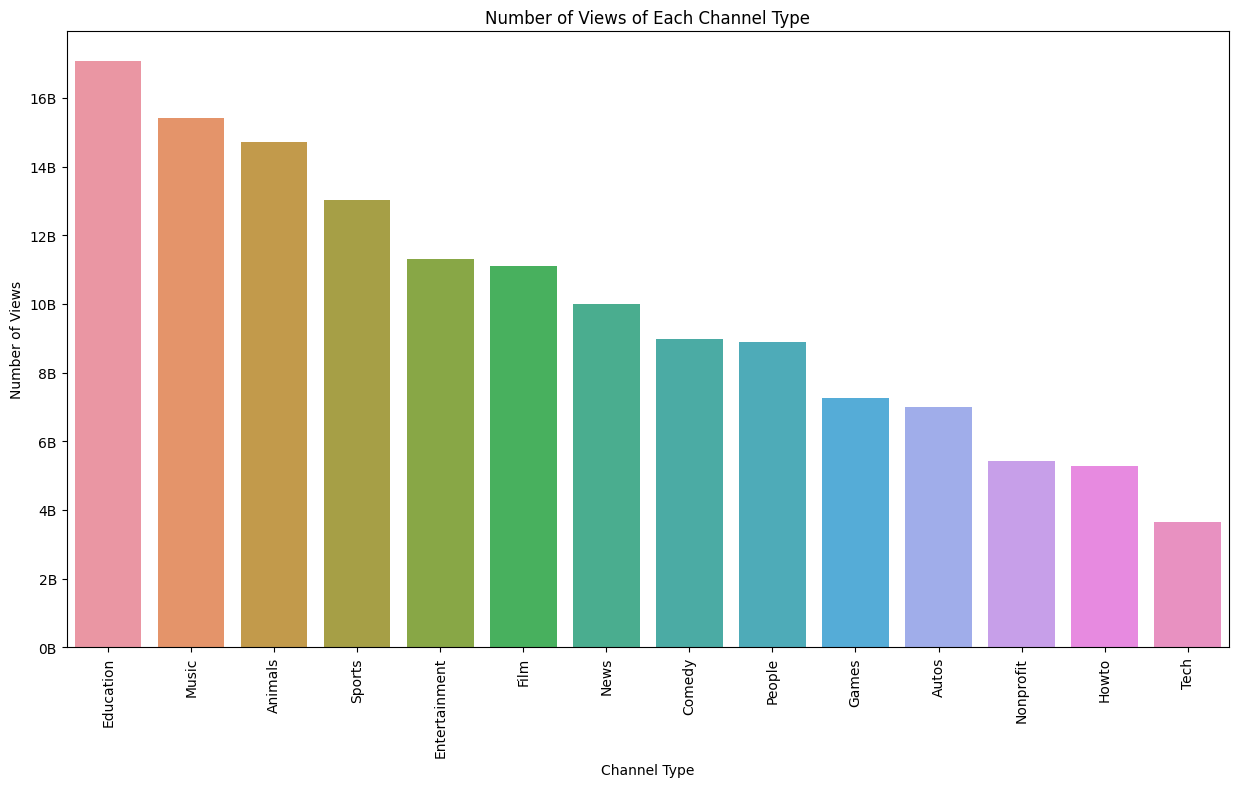

In [16]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x=view_type.index, y=view_type.values)

plt.xticks(rotation=90)

plt.title('Number of Views of Each Channel Type')

plt.gca().set_yticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_yticks()])

plt.xlabel('Channel Type')
plt.ylabel('Number of Views')

<font color='red'> Youtube channel type that has the greates number of views is 'Education'

# Number of youtuber channels for each channel type

<Axes: title={'center': 'Number of Channel for Each Type'}, xlabel='channel type', ylabel='count'>

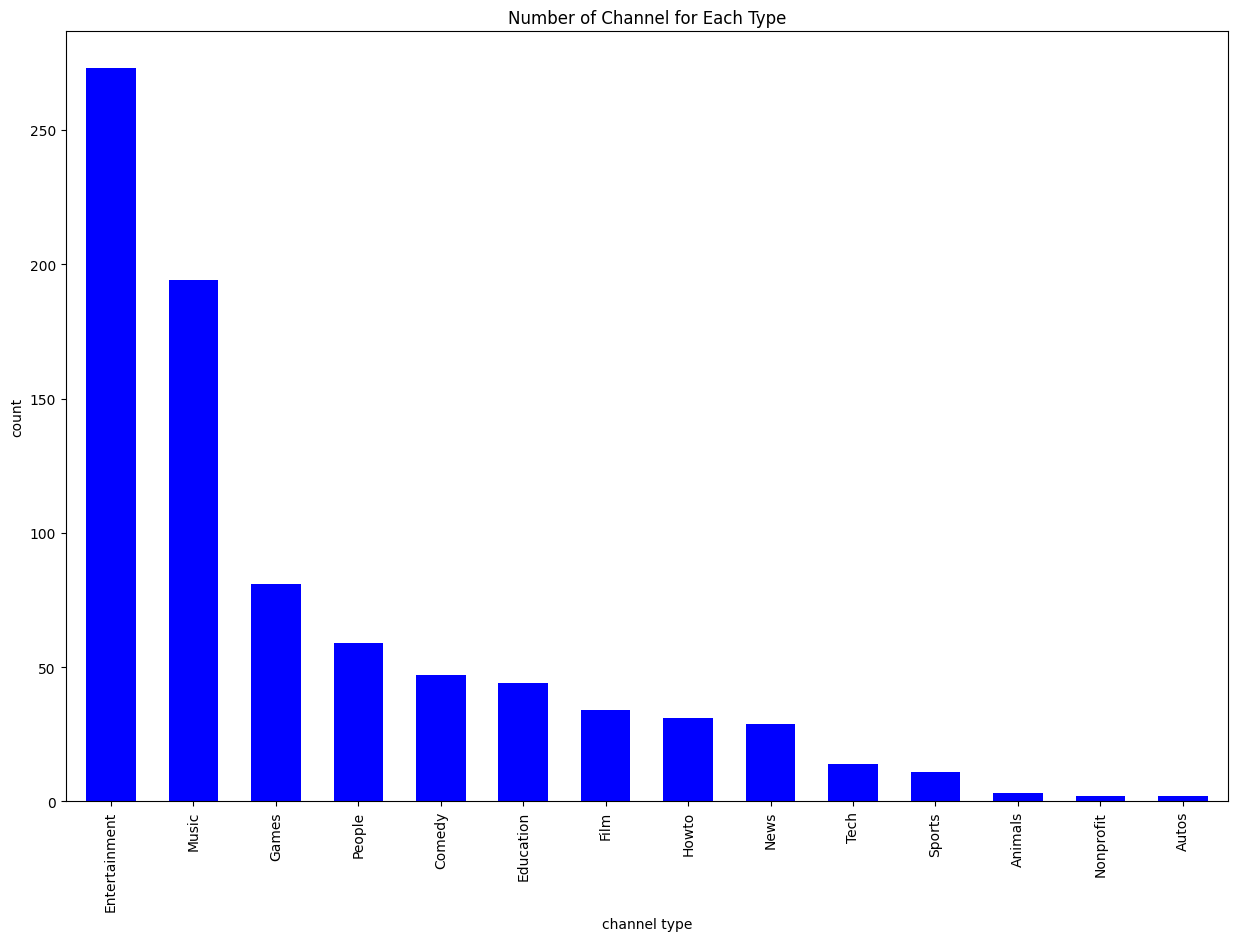

In [17]:
count = ytb_data['channel_type'].value_counts()

plt.figure(figsize=(15,10))
count.plot.bar(title='Number of Channel for Each Type', ylabel='count', xlabel='channel type', color='blue', width=0.6)

<font color='red'> from the graph above, we can see that most of the Youtube
channel type is Entertaiment, follows by Music. The least channel type is Autos </font>

# Number of youtube channels from each category

<Axes: title={'center': 'Number of Channel for Each Category'}, xlabel='category', ylabel='count'>

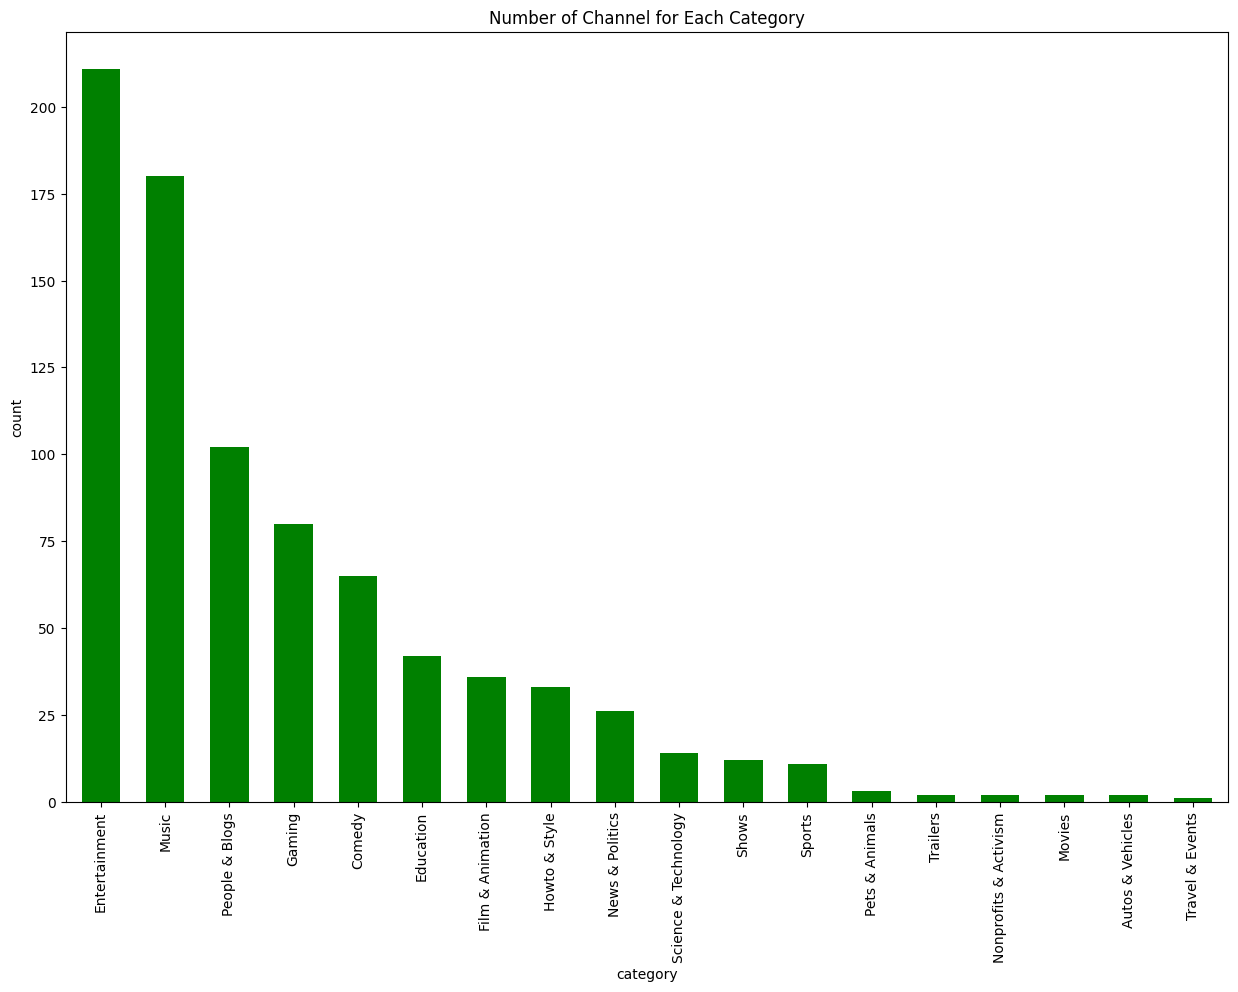

In [18]:
category = ytb_data['category'].value_counts()

plt.figure(figsize=(15,10))
category.plot.bar(title='Number of Channel for Each Category', ylabel='count', xlabel='category',color='green', width=0.6)

<font color='red'> from the graph above, we can see that most of the Youtube
category is Entertaiment, follows by Music. The least channel type is Travel & Events </font>

# Video Uploads VS Average Monthly and Yearly Earnings

<ipython-input-98-4ca1b58ff1d6>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])
<ipython-input-98-4ca1b58ff1d6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])


Text(0.5, 1.0, 'Number of Video Uploads vs Average Yearly Salary (USD)')

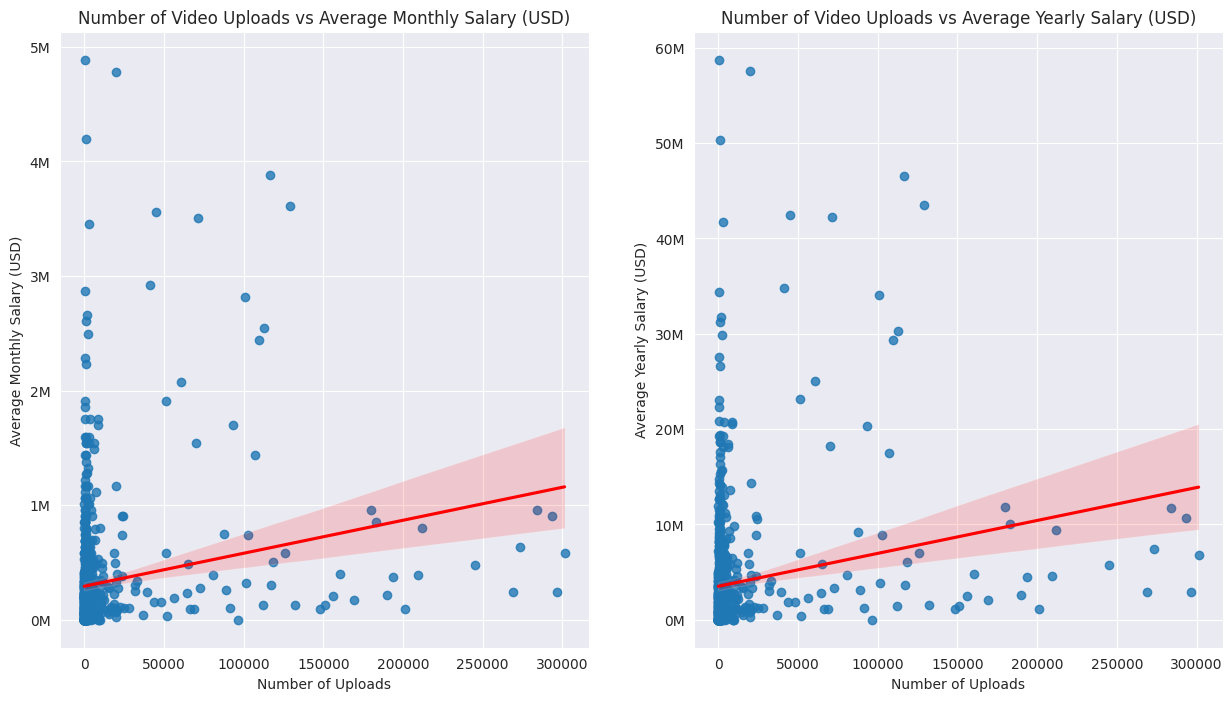

In [98]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)

sns.regplot(data = ytb_data2, y='Average Monthly Salary (USD)', x='uploads', line_kws={'color': 'red'})

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

# plt.gca().set_xticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_xticks()])

plt.xlabel('Number of Uploads')

plt.ylabel('Average Monthly Salary (USD)')

plt.title('Number of Video Uploads vs Average Monthly Salary (USD)')


plt.subplot(1,2,2)

sns.regplot(data = ytb_data2, y='Average Annual Salary (USD)', x='uploads', line_kws={'color': 'red'})

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

# plt.gca().set_xticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_xticks()])

plt.xlabel('Number of Uploads')

plt.ylabel('Average Yearly Salary (USD)')

plt.title('Number of Video Uploads vs Average Yearly Salary (USD)')



# Number of Subscribers VS Average Monthly and Yearly Earnings

<ipython-input-99-4f1b6a33fb74>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])
<ipython-input-99-4f1b6a33fb74>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_xticks()])
<ipython-input-99-4f1b6a33fb74>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])
<ipython-input-99-4f1b6a33fb74>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_xticks()])


Text(0.5, 1.0, 'Number of Subscribers vs Average Yearly Salary (USD)')

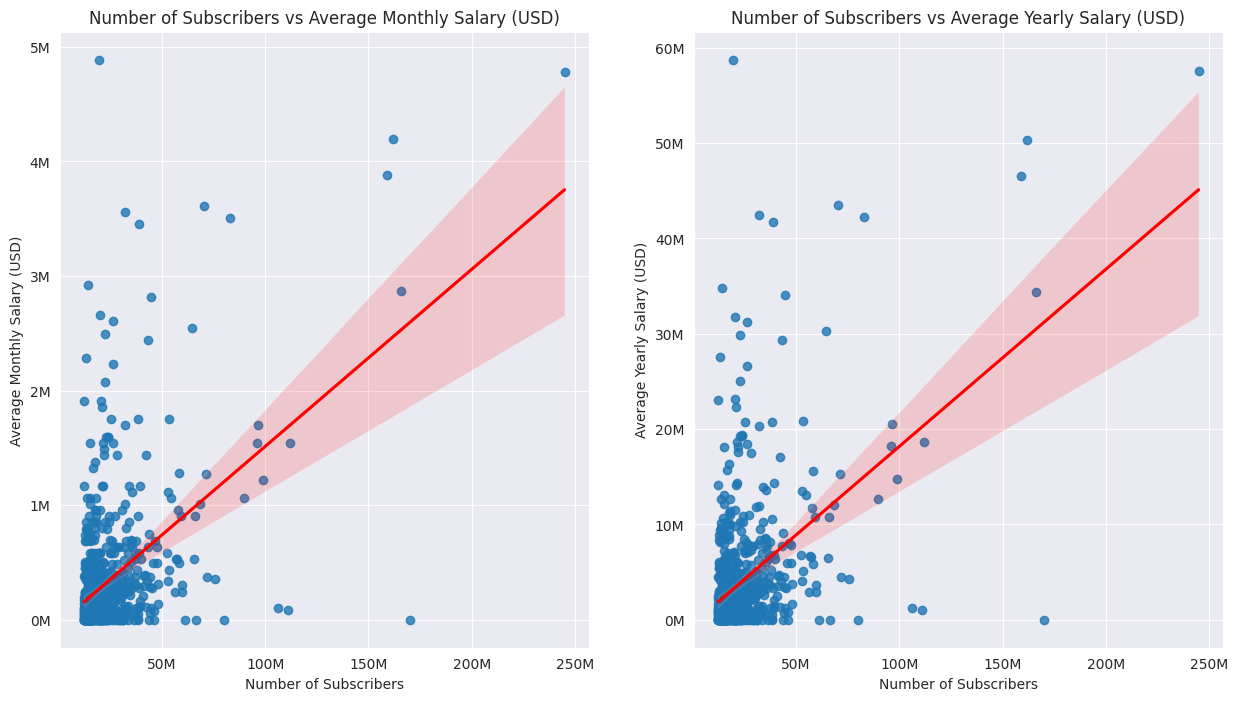

In [99]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)

sns.regplot(data = ytb_data2, y='Average Monthly Salary (USD)', x='subscribers', line_kws={'color': 'red'})

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.gca().set_xticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_xticks()])

plt.xlabel('Number of Subscribers')

plt.ylabel('Average Monthly Salary (USD)')

plt.title('Number of Subscribers vs Average Monthly Salary (USD)')


plt.subplot(1,2,2)

sns.regplot(data = ytb_data2, y='Average Annual Salary (USD)', x='subscribers', line_kws={'color': 'red'})

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.gca().set_xticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_xticks()])

plt.xlabel('Number of Subscribers')

plt.ylabel('Average Yearly Salary (USD)')

plt.title('Number of Subscribers vs Average Yearly Salary (USD)')



# Number of Views VS Average Monthly and Yearly Earnings

<ipython-input-100-a595a213569e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])
<ipython-input-100-a595a213569e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_xticks()])
<ipython-input-100-a595a213569e>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])
<ipython-input-100-a595a213569e>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_xticks()])


Text(0.5, 1.0, 'Number of Views vs Average Yearly Salary (USD)')

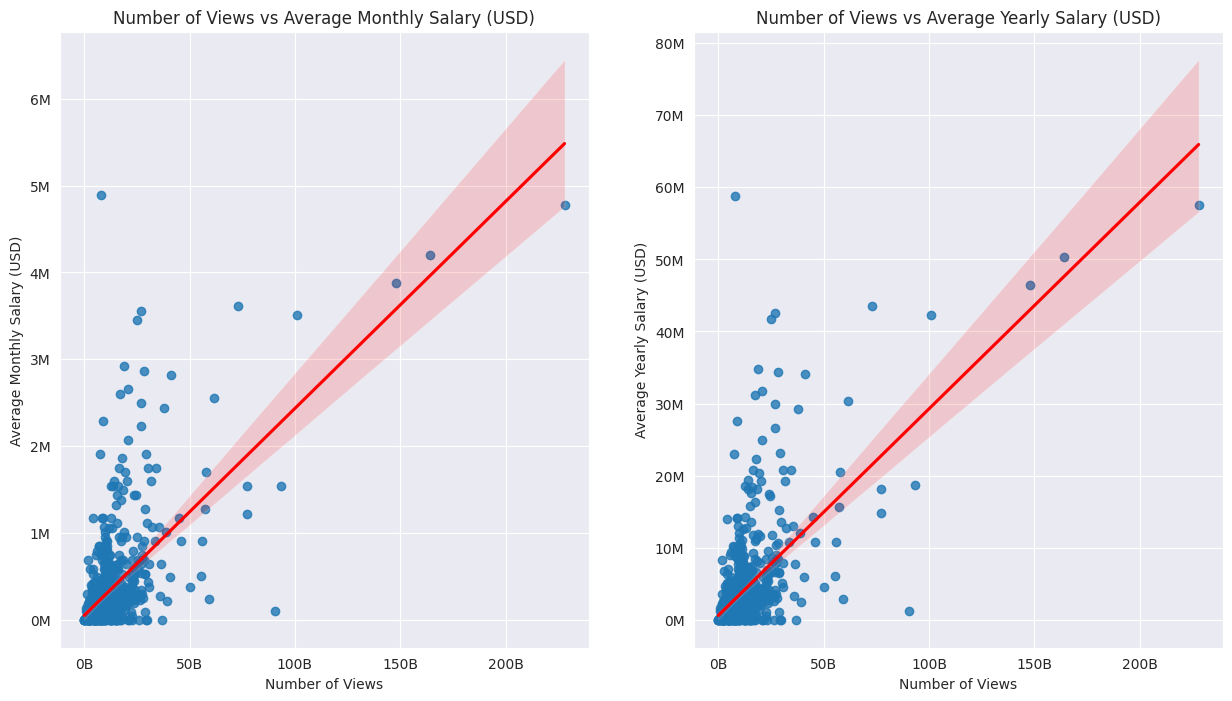

In [100]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)

sns.regplot(data = ytb_data2, y='Average Monthly Salary (USD)', x='video views', line_kws={'color': 'red'})

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.gca().set_xticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_xticks()])

plt.xlabel('Number of Views')

plt.ylabel('Average Monthly Salary (USD)')

plt.title('Number of Views vs Average Monthly Salary (USD)')


plt.subplot(1,2,2)

sns.regplot(data = ytb_data2, y='Average Annual Salary (USD)', x='video views', line_kws={'color': 'red'})

plt.gca().set_yticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_yticks()])

plt.gca().set_xticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_xticks()])

plt.xlabel('Number of Views')

plt.ylabel('Average Yearly Salary (USD)')

plt.title('Number of Views vs Average Yearly Salary (USD)')



# Dtype Separation

In [19]:
print(ytb_data.select_dtypes(include = ['object']).columns)

Index(['Youtuber', 'category', 'Title', 'Country', 'Abbreviation',
       'channel_type', 'created_day'],
      dtype='object')


In [20]:
ytb_data['Country'].value_counts()

United States           290
India                   161
Brazil                   61
United Kingdom           42
Mexico                   32
Indonesia                27
Spain                    21
Thailand                 18
Russia                   16
South Korea              15
Canada                   15
Argentina                13
Colombia                 11
Philippines              10
Saudi Arabia              9
Ukraine                   8
Australia                 8
Germany                   5
Japan                     5
United Arab Emirates      5
France                    5
Pakistan                  4
Sweden                    3
Vietnam                   3
Turkey                    3
Jordan                    3
Netherlands               3
Chile                     3
Iraq                      2
Ecuador                   2
Egypt                     2
Italy                     2
Finland                   1
Bangladesh                1
Peru                      1
Morocco             

# separate categorical and numerical data

In [21]:
categorical = ytb_data.select_dtypes(include= ['object']).columns
numerical = ytb_data.select_dtypes(include=['float64', 'int64']).columns

display(categorical)
display(numerical)

Index(['Youtuber', 'category', 'Title', 'Country', 'Abbreviation',
       'channel_type', 'created_day'],
      dtype='object')

Index(['index', 'rank', 'subscribers', 'video views', 'uploads',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

# unique value in each categorical data

In [22]:
cat_dict = {}

for x in categorical:
  cat_dict[x] = ytb_data[x].value_counts().shape[0]

cat_dict

{'Youtuber': 824,
 'category': 18,
 'Title': 822,
 'Country': 49,
 'Abbreviation': 49,
 'channel_type': 14,
 'created_day': 739}

# Relationship between number of views and number of subscribers

In [23]:
ytb_data_new = ytb_data.drop(['index'], axis=1)

In [24]:
ytb_data_new

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_day
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,6800000.00,1.084000e+08,2000000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-03-13
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.04,5.800000e-01,244908,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-03-05
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,4000000.00,6.470000e+07,8000000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,5900000.00,9.480000e+07,1000000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2006-09-01
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,5500000.00,8.750000e+07,1000000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2006-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,148200.00,2.400000e+06,100000,88.2,328239523,14.70,270663028,37.090240,-95.712891,2012-01-17
820,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,1700000.00,2.650000e+07,700000,51.3,212559417,12.08,183241641,-14.235004,-51.925280,2017-02-12
821,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,194200.00,3.100000e+06,300000,28.1,1366417754,5.36,471031528,20.593684,78.962880,2018-09-14
822,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,11600.00,1.858000e+05,100000,67.0,10285453,6.48,9021165,60.128161,18.643501,2012-05-09


In [25]:
import altair as alt


alt.Chart(ytb_data_new).mark_circle().encode(
  y='video views:Q',
  x='subscribers:Q',
  color='channel_type:N',
  tooltip=['Youtuber', 'subscribers', 'uploads','video views', 'category']
).interactive().properties(
    width=1000,
    height=500
)

alt.Chart(...)

<ipython-input-67-06af59dd40db>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_yticks()])
<ipython-input-67-06af59dd40db>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_xticks()])


Text(0.5, 1.0, 'Subscribers vs Video_views')

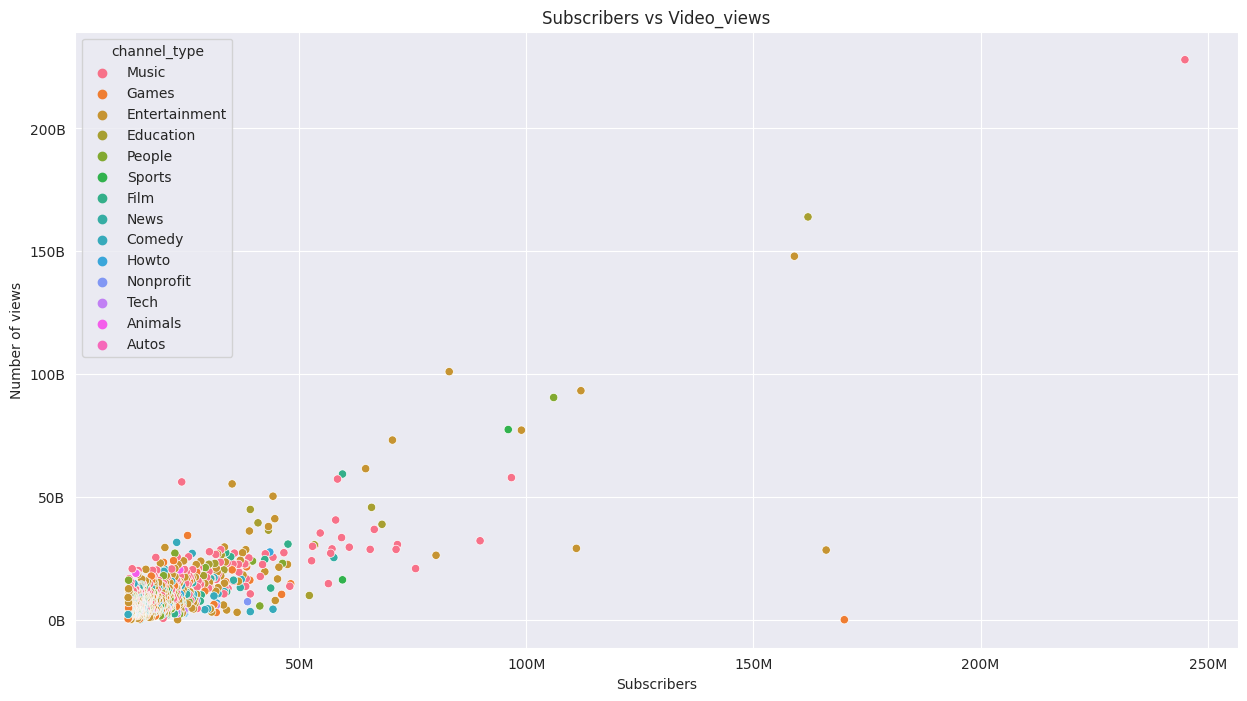

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=ytb_data_new, y='video views', x='subscribers', hue='channel_type')

plt.gca().set_yticklabels([f'{int(label/1e9)}B' for label in plt.gca().get_yticks()])

plt.gca().set_xticklabels([f'{int(label/1e6)}M' for label in plt.gca().get_xticks()])

plt.xlabel('Subscribers')
plt.ylabel('Number of views')
plt.title('Subscribers vs Video_views')


# get only numerical data

In [28]:
df_numerical = ytb_data[numerical]
df_numerical

,index,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,0,1,245000000,2.280000e+11,20082,1,1,1,2258000000,564600.0,9000000.00,6800000.00,1.084000e+08,2000000,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,1,2,170000000,0.000000e+00,1,4055159,7670,7423,12,0.0,0.05,0.04,5.800000e-01,244908,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,2,3,166000000,2.836884e+10,741,48,1,1,1348000000,337000.0,5400000.00,4000000.00,6.470000e+07,8000000,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,3,4,162000000,1.640000e+11,966,2,2,1,1975000000,493800.0,7900000.00,5900000.00,9.480000e+07,1000000,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,4,5,159000000,1.480000e+11,116536,3,2,2,1824000000,455900.0,7300000.00,5500000.00,8.750000e+07,1000000,28.1,1366417754,5.36,471031528,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,989,990,12400000,6.993406e+09,99,833,175,171,49412000,12400.0,197600.00,148200.00,2.400000e+06,100000,88.2,328239523,14.70,270663028,37.090240,-95.712891
820,990,991,12300000,9.029610e+09,1200,525,55,172,552513000,138100.0,2200000.00,1700000.00,2.650000e+07,700000,51.3,212559417,12.08,183241641,-14.235004,-51.925280
821,991,992,12300000,1.674410e+09,1500,6141,125,69,64735000,16200.0,258900.00,194200.00,3.100000e+06,300000,28.1,1366417754,5.36,471031528,20.593684,78.962880
822,993,994,12300000,3.741235e+08,39,35112,4,69,3871000,968.0,15500.00,11600.00,1.858000e+05,100000,67.0,10285453,6.48,9021165,60.128161,18.643501


# remove index

In [29]:
df_numerical.drop(['index'], axis=1, inplace=True)

<ipython-input-29-e586dac2cb9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.drop(['index'], axis=1, inplace=True)


# set rank as index

In [30]:
df_numerical.set_index('rank', inplace=True)

In [31]:
df_numerical

,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,
1,245000000,2.280000e+11,20082,1,1,1,2258000000,564600.0,9000000.00,6800000.00,1.084000e+08,2000000,28.1,1366417754,5.36,471031528,20.593684,78.962880
2,170000000,0.000000e+00,1,4055159,7670,7423,12,0.0,0.05,0.04,5.800000e-01,244908,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,166000000,2.836884e+10,741,48,1,1,1348000000,337000.0,5400000.00,4000000.00,6.470000e+07,8000000,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,162000000,1.640000e+11,966,2,2,1,1975000000,493800.0,7900000.00,5900000.00,9.480000e+07,1000000,88.2,328239523,14.70,270663028,37.090240,-95.712891
5,159000000,1.480000e+11,116536,3,2,2,1824000000,455900.0,7300000.00,5500000.00,8.750000e+07,1000000,28.1,1366417754,5.36,471031528,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,12400000,6.993406e+09,99,833,175,171,49412000,12400.0,197600.00,148200.00,2.400000e+06,100000,88.2,328239523,14.70,270663028,37.090240,-95.712891
991,12300000,9.029610e+09,1200,525,55,172,552513000,138100.0,2200000.00,1700000.00,2.650000e+07,700000,51.3,212559417,12.08,183241641,-14.235004,-51.925280
992,12300000,1.674410e+09,1500,6141,125,69,64735000,16200.0,258900.00,194200.00,3.100000e+06,300000,28.1,1366417754,5.36,471031528,20.593684,78.962880


# correlation

In [32]:
corr = ytb_data.iloc[:,1:].corr()
corr

<ipython-input-32-9d2b64572c9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ytb_data.iloc[:,1:].corr()


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.633618,-0.464721,-0.059089,-0.003617,0.006083,0.000450,-0.208455,-0.308226,-0.307809,-0.308389,-0.308258,-0.212370,-0.024677,-0.043506,-0.008913,-0.054834,0.002028,0.006888
subscribers,-0.633618,1.000000,0.794915,0.081787,0.022887,0.031347,0.022095,0.314993,0.499224,0.498829,0.499403,0.499244,0.343846,-0.011769,0.089890,-0.013941,0.088835,0.018308,0.033302
video views,-0.464721,0.794915,1.000000,0.162992,-0.045662,-0.049821,-0.048042,0.382816,0.640175,0.639544,0.640989,0.640196,0.223024,-0.021441,0.087340,-0.007397,0.081079,0.035158,0.041094
uploads,-0.059089,0.081787,0.162992,1.000000,-0.076457,-0.074480,-0.080439,0.107751,0.190414,0.190885,0.191411,0.190393,0.028637,-0.224009,0.145784,-0.192636,0.074741,-0.067430,0.241649
video_views_rank,-0.003617,0.022887,-0.045662,-0.076457,1.000000,0.862730,0.944613,0.009313,-0.150716,-0.150762,-0.150808,-0.150721,-0.087002,0.067573,-0.111388,-0.005367,-0.117489,0.029602,-0.046275
country_rank,0.006083,0.031347,-0.049821,-0.074480,0.862730,1.000000,0.895457,-0.082529,-0.146388,-0.146410,-0.146482,-0.146394,-0.077623,0.120317,-0.060194,0.092678,-0.019552,0.064448,-0.101777
channel_type_rank,0.000450,0.022095,-0.048042,-0.080439,0.944613,0.895457,1.000000,-0.083735,-0.155889,-0.155927,-0.155997,-0.155893,-0.088858,0.070288,-0.115210,0.004100,-0.119732,0.012217,-0.061116
video_views_for_the_last_30_days,-0.208455,0.314993,0.382816,0.107751,0.009313,-0.082529,-0.083735,1.000000,0.612318,0.612272,0.612249,0.612316,0.382242,-0.049687,0.075083,0.000197,0.074721,-0.038637,0.039259
lowest_monthly_earnings,-0.308226,0.499224,0.640175,0.190414,-0.150716,-0.146388,-0.155889,0.612318,1.000000,0.999943,0.999924,0.999998,0.617208,-0.079767,0.144918,-0.038881,0.124767,-0.007561,0.093015
highest_monthly_earnings,-0.307809,0.498829,0.639544,0.190885,-0.150762,-0.146410,-0.155927,0.612272,0.999943,1.000000,0.999850,0.999941,0.617536,-0.079292,0.144948,-0.038511,0.124910,-0.007135,0.092755


<Axes: >

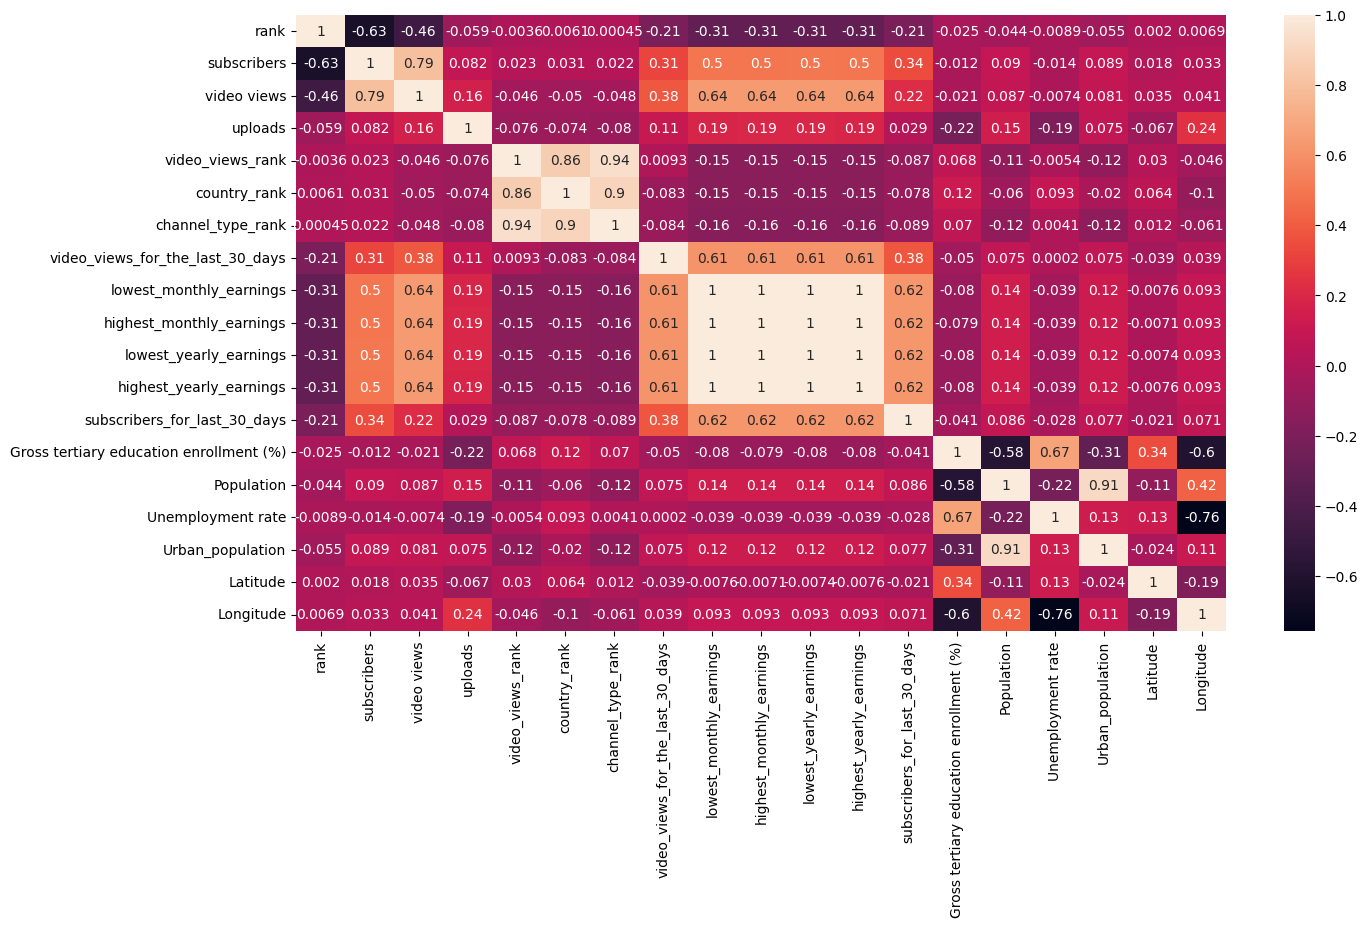

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

<font color='red'> from the heatmap, we can see that 'rank' has high positive correlation to 'subscribers'</font>

<font color='red'> 'subscriber' has high positive correlation to 'video_views'</font>

<font color='red'>Another interesting result is that popultaion does not significantly affect the number of subscribers </font>

<font color='red'>Earning of the youtuber has but not significant correalation with 'video_views_for_the_last_30_days' and 'subscribers_for_last_30_days'
</font>

#<font> Feature selection based on correlation </font>

In [34]:
#select features based on correlation

threshold = 0.5
s = abs(corr['rank'])
selectedFeature = s[s>0.5]
print(selectedFeature)

rank           1.000000
subscribers    0.633618
Name: rank, dtype: float64


<font color='red'>by using correlation to find out most relevant feature to 'rank', 'subscribers' turns out to be the selected feature

In [35]:
threshold = 0.5
s = abs(corr['subscribers'])
selectedFeature = s[s>0.5]
print(selectedFeature)

rank           0.633618
subscribers    1.000000
video views    0.794915
Name: subscribers, dtype: float64


<font color='red'>by using correlation to find out most relevant feature to 'subscribers', 'rank' and 'video views' turn out to be the selected feature